<a href="https://colab.research.google.com/github/khwwang/coding-training/blob/master/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EA%B0%9C%EC%9A%94%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install transformers
# !pip install selenium
# !apt-get update
# !apt install chromium-chromedriver
# !pip install pororo

In [ ]:
import pandas as pd
naturalTraining_data = pd.read_excel('/content/drive/MyDrive/행정안전부_긴급재난문자.xlsx')

In [ ]:
naturalTraining_data.head()
naturalTraining_data.sample(n=10)

,MD101_SN,CREAT_DT,MSG_CN,MSG_SE_CD,RCV_AREA_ID,RCV_AREA_NM,EMRGNCY_STEP_ID,EMRGNCY_STEP_NM,DSSTR_SE_ID,DSSTR_SE_NM,REGIST_DT,REGISTER_ID,MODF_DT,UPDUSR_ID,DELETE_AT,DT_REGT
277,198246,2023-07-16 15:03:15,"[서울경찰청] 금천구에서 배회중인 이기석씨(남,78세)를 찾습니다-158cm,60k...",cbs,144,서울특별시 금천구,4372,안전안내,14,기타,20230716150330,NDMSESB,20230716150430,NDMSESB,N,20230716150430
315,198208,2023-07-16 11:04:53,"[영광군] 호우경보 발효중. 오늘 오후 강하고 많은 비가 예상되니 하천, 해안가 등...",cbs,193,전라남도 영광군,4372,안전안내,3,호우,20230716110500,NDMSESB,20230716110930,NDMSESB,N,20230716110930
494,198029,2023-07-15 19:36:36,"[금정구] 오늘 새벽부터 많은 비가 예상되어 23시부로 온천천, 수영강 하천변산책로...",cbs,121,부산광역시 금정구,4372,안전안내,3,호우,20230715193700,NDMSESB,20230715193930,NDMSESB,N,20230715193930
111,198412,2023-07-17 14:38:54,"[경기남부경찰청] 부천시에서 배회중인 공복순씨(여, 79세)를 찾습니다 - 157c...",cbs,32,경기도 부천시,4372,안전안내,14,기타,20230717143900,NDMSESB,20230717143930,NDMSESB,N,20230717143930
406,198117,2023-07-15 22:21:51,"[포항시] 호우경보로 많은 비가 예상되니, 둔치주차장 내 주차차량은 안전한 곳으로 ...",cbs,87058730,"경상북도 포항시 남구 ,경상북도 포항시 북구",4372,안전안내,3,호우,20230715222200,NDMSESB,20230715222430,NDMSESB,N,20230715222430
414,198109,2023-07-15 22:01:50,"[동구청] 23.7.15. 21시 50분 호우경보에 따라 동구 초량1,2지하차도, ...",cbs,124,부산광역시 동구,4372,안전안내,3,호우,20230715220200,NDMSESB,20230715220430,NDMSESB,N,20230715220430
279,198244,2023-07-16 15:02:15,"[경기남부경찰청] 광명시에서 실종된 이기석씨(남,78세)를 찾습니다-158cm,60...",cbs,25,경기도 광명시,4372,안전안내,14,기타,20230716150230,NDMSESB,20230716150430,NDMSESB,N,20230716150430
54,198469,2023-07-17 18:59:11,[무주군]오늘 19시 무주군 전역에 산사태 주의보 발령. 위기징후 발생시 취약지역 ...,cbs,207,전라북도 무주군,4372,안전안내,12,산사태,20230717185930,NDMSESB,NaN,NaN,N,20230717185930
373,198150,2023-07-16 05:44:13,[곡성군]오늘 곡성군 지역 많은 비로 산사태 경보 발령. 산림 연접 거주민분들은 반...,cbs,182,전라남도 곡성군,4372,안전안내,12,산사태,20230716054430,NDMSESB,NaN,NaN,N,20230716054430
156,198367,2023-07-17 07:19:10,"[청주시청] 오송 궁평1지하차도는 침수로 차량 통행이 불가하여, 오송2교차로 및 만...",cbs,69226954696911296,"충청북도 청주시 상당구 ,충청북도 청주시 서원구 ,충청북도 청주시 흥덕구 ,충청북도...",4372,안전안내,2,홍수,20230717071930,NDMSESB,NaN,NaN,N,20230717071930


In [ ]:
naturalTraining_data.columns

Index(['MD101_SN', 'CREAT_DT', 'MSG_CN', 'MSG_SE_CD', 'RCV_AREA_ID',
       'RCV_AREA_NM', 'EMRGNCY_STEP_ID', 'EMRGNCY_STEP_NM', 'DSSTR_SE_ID',
       'DSSTR_SE_NM', 'REGIST_DT', 'REGISTER_ID', 'MODF_DT', 'UPDUSR_ID',
       'DELETE_AT', 'DT_REGT'],
      dtype='object')

## 재해구분과 메시지 내용만

In [ ]:
df = naturalTraining_data[['MSG_CN','DSSTR_SE_NM']]
df.head()

,MSG_CN,DSSTR_SE_NM
0,메시지 내용,재해구분 명
1,"[구미시청] 18일 새벽 시간 때 우리 지역에 많은 비가 예상되오니, 외출 자제 등...",호우
2,"[용인시]현재 호우주의보 발효중, 많은 비가 예상되오니 상습침수지역, 하천변 산책로...",호우
3,"[아산시] 반지하주택, 지하상가 등 바닥에 물이 차오르거나 하수 역류시 즉시 지상으...",호우
4,"[이천시청] 많은 비가 내리고 있습니다. 외출을 자제하시고 반지하, 저지대 침수우려...",호우


In [ ]:
# from sklearn.model_selection import train_test_split

# dataset_train, dataset_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=34)

In [ ]:
# !pip install git+https://github.com/kakaobrain/pororo.git

In [ ]:
# import sys
# import numpy as np
# import pandas as pd
# import random
# from tqdm.notebook import tqdm
# import os
# import re
# import time
# from collections import Counter

# import transformers
# from transformers import BertTokenizer,AdamWeightDecay,TFRobertaModel,TFBertModel

# import tensorflow as tf
# import keras
# from keras.callbacks import EarlyStopping,ModelCheckpoint

# import sklearn
# from sklearn.metrics import confusion_matrix,accuracy_score
# from sklearn.model_selection import StratifiedKFold

# import pororo
# from pororo import Pororo

# import selenium
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2023-07-22 07:13:53--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-07-22 07:13:53--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdbd91100b9af16c7df449bab3c.dl.dropboxusercontent.com/cd/0/get/CAX-vHi-uNMjM71-x52nCSx-XzsfNmwdwoZ6SIqued1wZnTKiLn28oWzgtEW3RD7WjOkT78okM_ogfdkqQhCpAdCQijgHcKB-p4ErXR-vYnGcCt43X6FtiRH8vqfc1dFu48q0jzcQp_SCa8s1JTPlY0NqCY2kKjCSo1IkBkEZULgYXm-ymieYX2vsbomsBevIuQ/file?dl=1# [following]
--2023-07-22 07:13:53--  https://ucdbd91100b9af16c7df449bab3c.dl.dropboxusercontent.com/cd/0/get/CAX-vHi-u

## konlpy의 okt import

In [ ]:
from konlpy.tag import Okt

Okt = Okt()

In [ ]:
sentence = df.iloc[1,0][6:]
sentence

' 18일 새벽 시간 때 우리 지역에 많은 비가 예상되오니, 외출 자제 등 안전에 유의하시기 바랍니다.'

In [ ]:
Okt.morphs(sentence)

['18일',
 '새벽',
 '시간',
 '때',
 '우리',
 '지역',
 '에',
 '많은',
 '비',
 '가',
 '예상',
 '되오니',
 ',',
 '외출',
 '자제',
 '등',
 '안전',
 '에',
 '유의',
 '하시기',
 '바랍니다',
 '.']

In [ ]:
Okt.nouns(sentence)

['새벽', '시간', '때', '우리', '지역', '비', '예상', '외출', '자제', '등', '안전', '유의']

In [ ]:
Okt.pos(sentence)

[('18일', 'Number'),
 ('새벽', 'Noun'),
 ('시간', 'Noun'),
 ('때', 'Noun'),
 ('우리', 'Noun'),
 ('지역', 'Noun'),
 ('에', 'Josa'),
 ('많은', 'Adjective'),
 ('비', 'Noun'),
 ('가', 'Josa'),
 ('예상', 'Noun'),
 ('되오니', 'Verb'),
 (',', 'Punctuation'),
 ('외출', 'Noun'),
 ('자제', 'Noun'),
 ('등', 'Noun'),
 ('안전', 'Noun'),
 ('에', 'Josa'),
 ('유의', 'Noun'),
 ('하시기', 'Verb'),
 ('바랍니다', 'Verb'),
 ('.', 'Punctuation')]

## 불용어 stopwords.txt가져와서 처리

In [ ]:
f = open('/content/stopwords.txt', 'r')
lines = f.readlines()
stopwords = []
for line in lines:
    line = line.replace('\n', '')
    stopwords.append(line)
f.close()

In [ ]:
word_tokens = Okt.morphs(sentence)

result = [word for word in word_tokens if not word in stopwords]
result

['18일',
 '새벽',
 '지역',
 '많은',
 '비',
 '예상',
 '되오니',
 ',',
 '외출',
 '자제',
 '안전',
 '유의',
 '하시기',
 '바랍니다',
 '.']

## 메세지 내용 앞에 [지역] 제거

In [ ]:
import re

def remove_brackets(text):
    # 정규표현식 패턴 설정
    pattern = r'\[[^\]]+\]'
    # 대괄호와 대괄호 안의 내용을 모두 제거
    result = re.sub(pattern, '', text)
    return result

In [ ]:
df.head()

,MSG_CN,DSSTR_SE_NM
0,메시지 내용,재해구분 명
1,"[구미시청] 18일 새벽 시간 때 우리 지역에 많은 비가 예상되오니, 외출 자제 등...",호우
2,"[용인시]현재 호우주의보 발효중, 많은 비가 예상되오니 상습침수지역, 하천변 산책로...",호우
3,"[아산시] 반지하주택, 지하상가 등 바닥에 물이 차오르거나 하수 역류시 즉시 지상으...",호우
4,"[이천시청] 많은 비가 내리고 있습니다. 외출을 자제하시고 반지하, 저지대 침수우려...",호우


## 먼저 호우 재난 데이터로만 실습

In [ ]:
dt = df.query('DSSTR_SE_NM == "호우"')

In [ ]:
len(dt['MSG_CN'])

339

In [ ]:
a = df.iloc[1,0]
remove_brackets(a)

' 18일 새벽 시간 때 우리 지역에 많은 비가 예상되오니, 외출 자제 등 안전에 유의하시기 바랍니다.'

In [ ]:
po = []
for i in range(1,339):
  a = dt.iloc[i,0]
  b = remove_brackets(a)
  po.append(b)
data = pd.DataFrame(po)
data

,0
0,"현재 호우주의보 발효중, 많은 비가 예상되오니 상습침수지역, 하천변 산책로, 산사태..."
1,"반지하주택, 지하상가 등 바닥에 물이 차오르거나 하수 역류시 즉시 지상으로 대피해..."
2,"많은 비가 내리고 있습니다. 외출을 자제하시고 반지하, 저지대 침수우려지역 주민께..."
3,"내일 새벽에 많은 비가 예상되오니 출근길 안전에 유의하시기 바라며, 침수 우려 시..."
4,"아산시 호우경보 발효중으로 하천변 산책로, 하천변 주차장, 농경지 배수로, 산사태..."
...,...
333,"오늘 19시30분 호우경보, 산사태ㆍ상습침수 등 위험지역 대피, 외출자제 등 안전..."
334,\n기습적인 폭우로 산사태 및 하천 수위상승이 예상되오니 위험지역 접근을 금지하시고...
335,"집중호우로 인해 하천 수위가 상승하여 삼천, 전주천, 만경강 아래차로가 전면 통제..."
336,"지리산부근 시간당 30~50mm의 폭우 예보\n\n외출자제,산사태,하천범람,상습침..."


1. 이제 단어 나누기
2. 단어들 불용어 처리하기
3. 데이터 test, train 나누기
4. 토크나이저로 인덱벡터로 변환
5. 전처리 완료된 데이터 넘파이 파일로 저장
6. 학습

In [ ]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
new_data = [review for review in data[0] if type(review) is str]
new_data

['현재 호우주의보 발효중, 많은 비가 예상되오니 상습침수지역, 하천변 산책로, 산사태위험지역 등 위험지역 접근을 금지하여 주시기 바랍니다.',
 ' 반지하주택, 지하상가 등 바닥에 물이 차오르거나 하수 역류시 즉시 지상으로 대피해 주세요. 공동주택 지하주차장은 빗물 유입 시 출입을 금지해 주세요.',
 ' 많은 비가 내리고 있습니다. 외출을 자제하시고 반지하, 저지대 침수우려지역 주민께서는 침수 징후 즉시 마을회관 등 안전지대로 대피하시기 바랍니다.',
 ' 내일 새벽에 많은 비가 예상되오니 출근길 안전에 유의하시기 바라며, 침수 우려 시 지하, 하천변, 저지대 지역은 출입을 금지해 주시기 바랍니다.',
 ' 아산시 호우경보 발효중으로 하천변 산책로, 하천변 주차장, 농경지 배수로, 산사태 우려지역에 접근 금지 바랍니다. -아산시 재난안전대책본부-',
 ' 관내 전지역 호우주의보 발효로 급경사지 인근 주민들께서는 마을회관 등 사전대피 장소를 미리 확인하시고, 이상 징후 발견시 즉시 대피하시기 바랍니다.',
 ' 17~18일 사이 100~300mm 많은 비가 예보되어, 산사태, 침수, 급경사지 위험지역 등에 거주하시는 주민들은 안전한 곳으로 대피하시기 바랍니다.',
 ' 20시 30분 호우주의보 발효에 따라 상습침수도로를 22시 10분에 차단하오니 도로이용객은 우회하시기 바랍니다.',
 ' 수원시 전지역 호우주의보 발효 중. 하천 산책로 등 위험지역 방문을 자제하여 주시고, 반지하, 저지대, 침수 우려지역 등은 안전에 유의 바랍니다.',
 ' 반지하주택, 지하상가 등 바닥에 물이 차오르거나 하수 역류시 즉시 지상으로 대피해주세요. 공동주택 지하주차장은 빗물 유입 시 출입을 금지해주세요.',
 '오늘 밤부터 내일까지 우리시에 많은 비가 오겠으니 산사태위험지역, 하천변, 침수우려구역 접근을 금지하여 주시고 재난방송청취등 안전에 유의하시기 바랍니다',
 ' 원평동 원지교 하천 둔치변 진입을 금지하오니 하천변, 저지대 등 위험지역은 접근하지 마시고 안전에 유의하시기 

## okt로 명사와 형용사만으로 work cloud만들기

In [ ]:
new = []
for i in range(len(new_data)):
  new.append(Okt.pos(new_data[i]))

In [ ]:
list = []
for i in range(len(new)):
  a = [word[0] for word in new[i] if word[1] == 'Noun' or word[1] == 'Adjective']
  list = list + a
list

['현재',
 '호우',
 '주의보',
 '발효',
 '많은',
 '비',
 '예상',
 '상습',
 '침수',
 '지역',
 '하천',
 '변',
 '산책로',
 '산사태',
 '위험',
 '지역',
 '등',
 '위험',
 '지역',
 '접근',
 '금지',
 '시기',
 '반지하',
 '주택',
 '지하상가',
 '등',
 '바닥',
 '물이',
 '하수',
 '역류',
 '시',
 '즉시',
 '지상',
 '피해',
 '공동',
 '주택',
 '지하',
 '주차장',
 '빗물',
 '유입',
 '시',
 '출입',
 '금지',
 '많은',
 '비',
 '있습니다',
 '외출',
 '자제',
 '반지하',
 '지대',
 '침수',
 '우려',
 '지역',
 '주민',
 '침수',
 '징후',
 '즉시',
 '마을',
 '회관',
 '등',
 '안전지대',
 '대피',
 '내일',
 '새벽',
 '많은',
 '비',
 '예상',
 '출근길',
 '안전',
 '유의',
 '침수',
 '우려',
 '시',
 '지하',
 '하천',
 '변',
 '지대',
 '지역',
 '출입',
 '금지',
 '시기',
 '아산시',
 '호우경보',
 '발효',
 '하천',
 '변',
 '산책로',
 '하천',
 '변',
 '주차장',
 '농경지',
 '배수로',
 '산사태',
 '우려',
 '지역',
 '접근',
 '금지',
 '아산시',
 '재난',
 '안전',
 '대책',
 '본부',
 '관내',
 '지역',
 '호우',
 '주의보',
 '발효',
 '급경사',
 '인근',
 '주민',
 '마을',
 '회관',
 '등',
 '사전',
 '대피',
 '장소',
 '미리',
 '확인',
 '이상',
 '징후',
 '발견',
 '시',
 '즉시',
 '대피',
 '사이',
 '많은',
 '비',
 '보되',
 '산사태',
 '침수',
 '급경사',
 '위험',
 '지역',
 '등',
 '거주',
 '주민',
 '안전한',
 '곳',
 '대피',
 '호우',
 '주의보',
 '발

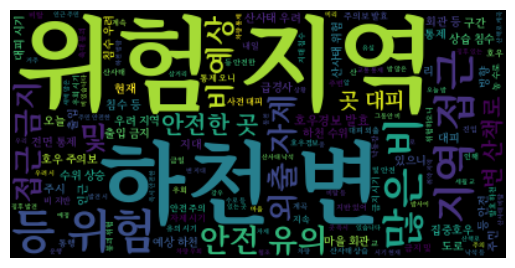

In [ ]:
wordcloud = WordCloud('/content/MaruBuri-Bold.ttf').generate(' '.join(list))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 데이터 안에 \n지우고 train, test나누기

In [ ]:
data[0] = data[0].str.replace('\n', '')
data

,0
0,"현재 호우주의보 발효중, 많은 비가 예상되오니 상습침수지역, 하천변 산책로, 산사태..."
1,"반지하주택, 지하상가 등 바닥에 물이 차오르거나 하수 역류시 즉시 지상으로 대피해..."
2,"많은 비가 내리고 있습니다. 외출을 자제하시고 반지하, 저지대 침수우려지역 주민께..."
3,"내일 새벽에 많은 비가 예상되오니 출근길 안전에 유의하시기 바라며, 침수 우려 시..."
4,"아산시 호우경보 발효중으로 하천변 산책로, 하천변 주차장, 농경지 배수로, 산사태..."
...,...
333,"오늘 19시30분 호우경보, 산사태ㆍ상습침수 등 위험지역 대피, 외출자제 등 안전..."
334,기습적인 폭우로 산사태 및 하천 수위상승이 예상되오니 위험지역 접근을 금지하시고 인...
335,"집중호우로 인해 하천 수위가 상승하여 삼천, 전주천, 만경강 아래차로가 전면 통제..."
336,"지리산부근 시간당 30~50mm의 폭우 예보외출자제,산사태,하천범람,상습침수 등 ..."


In [109]:
a = 0
for i in range(len(data[0])):
  if len(data[0][i]) > a:
    a = len(data[0][i])
a

85

In [ ]:
from sklearn.model_selection import train_test_split

# X: 입력 데이터, y: 레이블 (타겟) 데이터
train, test= train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train

,0
7,20시 30분 호우주의보 발효에 따라 상습침수도로를 22시 10분에 차단하오니 도...
225,"많은 비가 내리고 있습니다. 가급적 외출을 자제하시고, 노후주택, 산사태 취약지역 ..."
145,17:41부 APEC로 시립미술관 일대 차량 통제가 해제되었음을 알려드립니다.(세...
301,"20:30 고령군 호의경보 발효.하천변 접근 삼가바라며 및 노후주택, 산사태 취약지..."
297,"새벽에 강한비가 예상됩니다. 하천변이나 산간계곡 행락객은 즉시 이동하시고, 약해진..."
...,...
188,"성동면 우곤리 일원 인근 금강 제방이 유실되어 위험하오니 성광온누리학교, 구)주민..."
71,"일부지역 집중호우가 내리고 있습니다.비탈면 및 산사태, 낙석 등 위험지역 접근을 삼..."
106,계속된 폭우로 낙석위험이 있어 국도22호선(주암↔화순 양방향) 교통통제중이오니 유...
270,"양산지역 호우경보 발령으로 새벽에 많은 비가 예상되오니 외출 자제, 하천 및 산간..."


## Tokenizer로 벡터화

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
from keras.preprocessing.text import Tokenizer

train = [str(text) for text in train]  # 리스트 내의 요소들을 문자열로 변환
test = [str(text) for text in test]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train)

train_sequences = tokenizer.texts_to_sequences(train)
test_sequences = tokenizer.texts_to_sequences(test)

In [120]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 85 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
#train_labels = np.array(train[0])

#평가 데이터
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#평가 데이터 라벨 벡터화
#test_labels = np.array(test[0])

In [119]:
dd = naturalTraining_data[['MSG_CN','DSSTR_SE_NM','EMRGNCY_STEP_NM']]
ff = dd.query('DSSTR_SE_NM == "호우"')
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)

  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review
dd['DSSTR_SE_NM'].value_counts()
ff['EMRGNCY_STEP_NM'].value_counts()

안전안내    23
Name: EMRGNCY_STEP_NM, dtype: int64

In [ ]:
import re

def remove_brackets(text):
    # 정규표현식 패턴 설정
    pattern = r'\[[^\]]+\]'
    # 대괄호와 대괄호 안의 내용을 모두 제거
    result = re.sub(pattern, '', text)
    return result

In [115]:
clean_train_review = []

for review in ff['MSG_CN']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review,Okt,remove_stopwords=True,stop_words= stopwords))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:4]

[['구미시청',
  '새벽',
  '지역',
  '많다',
  '비',
  '예상',
  '되다',
  '외출',
  '자제',
  '안전',
  '유의',
  '하다',
  '바라다'],
 ['용인시',
  '현재',
  '호우',
  '주의보',
  '발효',
  '중',
  '많다',
  '비',
  '예상',
  '되다',
  '상습',
  '침수',
  '지역',
  '하천',
  '변',
  '산책로',
  '산사태',
  '위험',
  '지역',
  '위험',
  '지역',
  '접근',
  '금지',
  '하다',
  '주',
  '시기',
  '바라다'],
 ['아산시',
  '반지하',
  '주택',
  '지하상가',
  '바닥',
  '물이',
  '차오르다',
  '하수',
  '역류',
  '시',
  '지상',
  '대',
  '피해',
  '줄다',
  '공동',
  '주택',
  '지하',
  '주차장',
  '은',
  '빗물',
  '유입',
  '시',
  '출입',
  '금지',
  '하다',
  '줄다'],
 ['이천',
  '시청',
  '많다',
  '비',
  '내리다',
  '외출',
  '자제',
  '하다',
  '반지하',
  '지대',
  '침수',
  '우려',
  '지역',
  '주민',
  '께서는',
  '침수',
  '징후',
  '마을',
  '회관',
  '안전지대',
  '대피',
  '하다',
  '바라다']]

In [121]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [123]:
# from tensorflow.keras.layers import SimpleRNN

# model.add(SimpleRNN(hidden_units))


In [ ]:
from keras import layers

model = keras.Sequential()
model.add(layers.Embedding(500, 16, input_length=200)),
model.add(layers.LSTM(32, activation='tanh', return_sequences=True))
model.add(layers.LSTM(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))# 이진분류이므로 1

model.summary()

In [ ]:
model.compile(
    loss='bianry_crossentropy',
    optimizer='adam',
    metrics=['acuuracy']
)